# Statistical Data Analysis of Celluar Plans  

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.  

You will carry out a preliminary analysis of the plans based on a relatively small client selection. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.


## Table of Contents   

Step 1. Open the Data File and Study the General Information  
Step 2. Data Preprocessing   
Step 3. Analyze the Data   
Step 4. Test the Hypotheses  
Step 5. Overall Conclusion  

## **Step 1. Open the data file and study the general information**


<div class="alert alert-block alert-info">





In [ ]:
import pandas as pd
from scipy import stats as st
import numpy as np

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

In [ ]:
print('----------CALLS')
calls.info()
print('----------INTERNET')
internet.info()
print('----------MESSAGES')
messages.info()
print('----------PLANS')
plans.info()
print('----------USERS')
users.info()

----------CALLS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
----------INTERNET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
----------MESSAGES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
----------PLANS
<class 'pandas.

In [ ]:
print('----------CALLS')
calls.head()

----------CALLS


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [ ]:
print(calls['id'].value_counts())
print(calls['user_id'].value_counts())
print(calls['call_date'].value_counts())
print(calls['duration'].value_counts())

1111_120    1
1434_170    1
1393_203    1
1354_472    1
1362_409    1
           ..
1498_60     1
1144_300    1
1347_75     1
1059_450    1
1109_534    1
Name: id, Length: 137735, dtype: int64
1324    1300
1077    1224
1334    1140
1362    1121
1320    1080
        ... 
1104       4
1452       3
1306       3
1323       3
1034       2
Name: user_id, Length: 481, dtype: int64
2018-12-27    1091
2018-12-28    1085
2018-12-30    1080
2018-12-24    1078
2018-12-29    1070
              ... 
2018-01-17       6
2018-01-26       6
2018-01-15       5
2018-01-18       4
2018-01-24       3
Name: call_date, Length: 351, dtype: int64
0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64


In [ ]:

print('----------INTERNET')
internet.head()


----------INTERNET


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [ ]:
print(internet['id'].value_counts())
print(internet['user_id'].value_counts())
print(internet['session_date'].value_counts())
print(internet['mb_used'].value_counts())

1188_95     1
1268_407    1
1163_50     1
1078_43     1
1409_94     1
           ..
1261_610    1
1263_240    1
1303_15     1
1419_32     1
1434_362    1
Name: id, Length: 104825, dtype: int64
1185    851
1028    752
1171    716
1498    657
1214    652
       ... 
1323      3
1034      2
1108      2
1452      1
1306      1
Name: user_id, Length: 489, dtype: int64
2018-12-24    851
2018-12-30    845
2018-12-27    830
2018-12-21    826
2018-12-31    823
             ... 
2018-01-23      3
2018-01-20      2
2018-01-16      2
2018-01-15      2
2018-01-18      2
Name: session_date, Length: 351, dtype: int64
0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64


In [ ]:
print('----------MESSAGES')
messages.head()


----------MESSAGES


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
print(messages['id'].value_counts())
print(messages['user_id'].value_counts())
print(messages['message_date'].value_counts())

1381_433    1
1199_55     1
1434_275    1
1077_248    1
1101_242    1
           ..
1044_120    1
1082_101    1
1249_170    1
1444_126    1
1258_410    1
Name: id, Length: 76051, dtype: int64
1132    1288
1328    1233
1324    1175
1470    1056
1077     804
        ... 
1481       3
1190       3
1161       2
1323       1
1479       1
Name: user_id, Length: 402, dtype: int64
2018-12-28    702
2018-12-27    701
2018-12-25    699
2018-12-31    699
2018-12-18    688
             ... 
2018-01-21      3
2018-01-24      2
2018-02-18      2
2018-01-15      2
2018-01-19      1
Name: message_date, Length: 351, dtype: int64


In [ ]:
print('----------PLANS')
plans.head()


----------PLANS


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [ ]:
print(plans['messages_included'].value_counts())
print(plans['mb_per_month_included'].value_counts())
print(plans['minutes_included'].value_counts())
print(plans['usd_monthly_pay'].value_counts())
print(plans['usd_per_gb'].value_counts())
print(plans['usd_per_message'].value_counts())
print(plans['usd_per_minute'].value_counts())
print(plans['plan_name'].value_counts())


50      1
1000    1
Name: messages_included, dtype: int64
30720    1
15360    1
Name: mb_per_month_included, dtype: int64
3000    1
500     1
Name: minutes_included, dtype: int64
70    1
20    1
Name: usd_monthly_pay, dtype: int64
7     1
10    1
Name: usd_per_gb, dtype: int64
0.01    1
0.03    1
Name: usd_per_message, dtype: int64
0.01    1
0.03    1
Name: usd_per_minute, dtype: int64
ultimate    1
surf        1
Name: plan_name, dtype: int64


In [ ]:
print('----------USERS')
users.head()

----------USERS


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [ ]:
print(users['user_id'].value_counts())
print(users['first_name'].value_counts())
print(users['last_name'].value_counts())
print(users['age'].value_counts())
print(users['city'].value_counts())
print(users['reg_date'].value_counts())
print(users['plan'].value_counts())
print(users['churn_date'].value_counts())

1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64
Jasper      3
Leonila     3
Seymour     3
Miguel      2
Lenard      2
           ..
Tammara     1
Meggan      1
Shavon      1
Kasandra    1
Ruthanne    1
Name: first_name, Length: 458, dtype: int64
Brock        3
David        3
Wilkinson    3
Hoffman      3
Kelley       3
            ..
Perry        1
Baldwin      1
Willis       1
Malone       1
Snider       1
Name: last_name, Length: 399, dtype: int64
18    15
61    14
27    14
70    14
69    14
20    13
28    13
33    12
30    12
65    11
52    11
67    11
39    11
47    11
51    11
29    10
34    10
26    10
36    10
42    10
45    10
49    10
75    10
53    10
64    10
46    10
23     9
60     9
66     9
56     9
19     8
44     8
21     8
59     8
57     7
22     7
41     7
38     7
25     7
48     7
50     6
24     6
71     6
55     6
63     6
31     6
54     6
37     6
40     6
74

* Looking at the preliminary data, I found that there were no missing values in this data except for one column in the megaline_users dataframe.  In the column churn_date, most of the rows were left blank (because most of the people hadn't canceled their services: they were still customers.)

* In the megaline_calls dataframe, I also noticed something that would prove to be consistent throughout the analysis; the minutes used per month fell far below the minimum allowed in the least expensive, Surf, program.

* In the megaline_internet dataframe, however, I noticed that the opposite was true.  The averages showed that the mb_used were higher than the minimum used which is not something that I found in the subsequent analysis.  In the subsequent analysis below, the averages of the internet usage, once divided into the separate plans, were much lower.

* Additionally, I noticed that the average age of the user was 45.  






## **Step 2. Data preprocessing**

<div class="alert alert-block alert-info">

* For this section, I had initially thought about changing the dates in all the files at the same time to datetime.  However, I ultimately decided just to tackle preprocessing one data file at a time.  There was no particular reason that I worked on them in the order that I did other than it was simply alphabetical.  

* Additionally, I considered converting the data usage information for calls and internet to int64.  However, I worried that a complete cut of the extra seconds/mb's would negatively impact the results of analysis and decided to not convert the numbers.


## megaline_calls

In [ ]:
##megaline_calls

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month_year'] = pd.to_datetime(calls['call_date']).dt.to_period('M')



monthly_calls = calls.groupby(['user_id','month_year']).duration.sum()


calls.head()

,id,user_id,call_date,duration,month_year
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


### Conclusion

* For this dataframe, I opted to convert the regular call_date using datetime (even though, ultimately, I didn't use it) and I created a new datetime column based on the month and year only so as to make the grouping of data possible below.  

* I also created a new series using groupby to calculate the sum of call duration based upon user_id and month.

* I considered eliminating the calls listed as 0 minutes but opted not to as their presence didn't impact the calculations made below.


In [ ]:
##megaline_internet

internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
internet['month_year'] = pd.to_datetime(internet['session_date']).dt.to_period('M')

monthly_internet = (internet.groupby(['user_id','month_year']).mb_used.sum()/1024).apply(np.ceil)
print(monthly_internet.head())


user_id  month_year
1000     2018-12        2.0
1001     2018-08        7.0
         2018-09       14.0
         2018-10       22.0
         2018-11       19.0
Name: mb_used, dtype: float64


### Conclusion  

* For this dataframe, I opted to convert the regular call_date using datetime (even though, ultimately, I didn't use it)
and I created a new datetime column based on the month and year only so as to make the grouping of data possible below.  

* I also created a new series using groupby to calculate the sum of mb used per user, per month.  The extra price for internet service was listed in gb and not mb so the formula was divided by 1024 to convert the data to mb.  


In [ ]:
##megaline_messages

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')

messages['month_year'] = pd.to_datetime(messages['message_date']).dt.to_period('M')

monthly_messages = messages.groupby(['user_id','month_year']).message_date.count()
print(monthly_messages.head())


user_id  month_year
1000     2018-12       11
1001     2018-08       30
         2018-09       44
         2018-10       53
         2018-11       36
Name: message_date, dtype: int64


### Conclusion  

* For this dataframe, I opted to convert the regular call_date using datetime (even though, ultimately, I didn't use it) and I created a new datetime column based on the month  and year only so as to make the grouping of data possible below.

* I also used groupby to calculate test message usage based on user_id and month.

## megaline_plans   



* As this file consisted of two rows only and each row was already in int64 format (except for the usd columns), I left this file as is.  I didn't convert the usd columns as the format being currently used seems most appropriate.

In [ ]:
##megaline_users

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')

users['month_year'] = pd.to_datetime(users['reg_date']).dt.to_period('M')
users['month_year'] = pd.to_datetime(users['churn_date']).dt.to_period('M')



### Conclusion  
* For this dataframe, I opted to convert the regular call_date using datetime (even though, ultimately, I didn't use it) and I created a new datetime column based on the month and year only for both the reg_date and churn_date.  

In [ ]:
concat_1 = pd.concat([monthly_calls, monthly_internet, monthly_messages],1).reset_index().fillna(0)


combined_df = pd.merge(concat_1,users, on= 'user_id', left_index = True, how='inner')



combined_df.rename(columns={'message_date':'message_count', 'duration':'call_duration'}, inplace=True)


combined_df.head()

,user_id,month_year_x,call_duration,mb_used,message_count,first_name,last_name,age,city,reg_date,plan,churn_date,month_year_y
0,1000,2018-12,116.83,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,NaT
1,1001,2018-08,171.14,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,NaT
1,1001,2018-09,297.69,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,NaT
1,1001,2018-10,374.11,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,NaT
1,1001,2018-11,404.59,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,NaT


### Conclusion  
* In this section, I combined the three new series created above (groupby) with the megaline_users dataframe in order to make calculations easier.  

In [ ]:
plansNice = plans
plansNice.set_index('plan_name', inplace=True)

In [ ]:


def calc_profit(row):

    plan = row['plan']
    #print(plan)
    minutes_inc = plansNice.loc[plan].minutes_included
    mb_inc = plansNice.loc[plan].mb_per_month_included
    messages_inc = plansNice.loc[plan].messages_included
    extra_per_mb_fee = plansNice.loc[plan].usd_per_gb/1000
    extra_per_minute_fee = plansNice.loc[plan].usd_per_minute
    extra_per_message_fee = plansNice.loc[plan].usd_per_message
    month_pay = plansNice.loc[plan].usd_monthly_pay

    if row['call_duration'] < minutes_inc :
        extraMinUsedFee = 0
    else:
        extraMinUsedFee = (row['call_duration'] - minutes_inc) * extra_per_minute_fee

    if row['mb_used'] < mb_inc:
        extraMbUsedFee = 0

    else:
        extraMbUsedFee = (row['mb_used'] - mb_inc) * extra_per_mb_fee

    if row['message_count'] < messages_inc:
        extraMessageUsedFee = 0

    else:
        extraMessageUsedFee = (row['message_count'] - messages_inc) * extra_per_message_fee


    profit = month_pay + extraMinUsedFee + extraMbUsedFee + extraMessageUsedFee


    return profit

combined_df['profit'] = combined_df.apply(calc_profit, axis=1)
print(combined_df.head())

   user_id month_year_x  call_duration  mb_used  message_count first_name  \
0     1000      2018-12         116.83      2.0           11.0   Anamaria   
1     1001      2018-08         171.14      7.0           30.0     Mickey   
1     1001      2018-09         297.69     14.0           44.0     Mickey   
1     1001      2018-10         374.11     22.0           53.0     Mickey   
1     1001      2018-11         404.59     19.0           36.0     Mickey   

   last_name  age                                   city   reg_date      plan  \
0      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
1  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
1  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
1  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   

  churn_date month_year_y  profit  
0        NaN  

### Conclusion  
* For this secion, I calculated the profits for each plan.  

## Step III: Analyze the Data


In [ ]:
#Surf Plan: Mean and Median

surf_plan_users_data = combined_df[combined_df['plan'] == 'surf']

print('CALL DURATION CALCULATIONS')
print(surf_plan_users_data['call_duration'].mean())
print(surf_plan_users_data['call_duration'].median())

print('________________')
print('INTERNET USAGE CALCULATIONS')
print(surf_plan_users_data['mb_used'].mean())
print(surf_plan_users_data['mb_used'].median())

print('_______________')
print('MESSAGE USAGE CALULATIONS')
print(surf_plan_users_data['message_count'].mean())
print(surf_plan_users_data['message_count'].median())

CALL DURATION CALCULATIONS
404.76239033693577
401.75999999999993
________________
INTERNET USAGE CALCULATIONS
16.670692943420217
17.0
_______________
MESSAGE USAGE CALULATIONS
31.15956770502225
24.0


### Conclusion  

* For the surf plan, both the mean and median number of minutes used per month fall below the package limit of 500 minutes per month.  

* The mean and median of Internet usage, however, both exceed the limit of 15360mb (15 gb).  

* And finally, although the mean and median differ in relation to message counts, they both fall below the package limit of 50 text messages per month.  

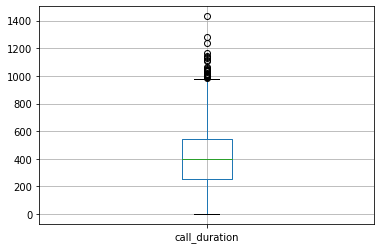

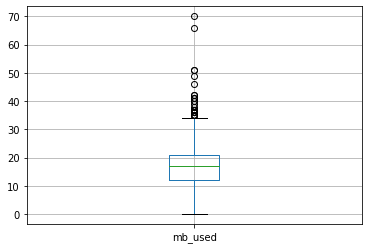

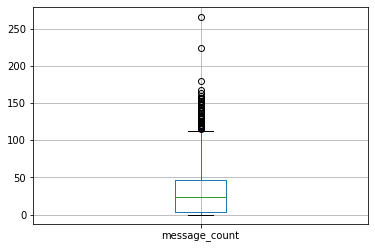

In [ ]:
## Surf Plan: Dispersion

import matplotlib.pyplot as plt


surf_plan_users_data.boxplot(column='call_duration')
plt.show()

surf_plan_users_data.boxplot(column='mb_used')
plt.show()

surf_plan_users_data.boxplot(column='message_count')
plt.show()


### Conclusion  
* The boxplots confirm the the mean and median calculations seen above but also demonstrate that there are many outliers within each field.  

In [ ]:
## Surf Plan: Standard Deviation

print(surf_plan_users_data['call_duration'].describe())

print(surf_plan_users_data['mb_used'].describe())

print(surf_plan_users_data['message_count'].describe())

count    1573.000000
mean      404.762390
std       221.664397
min         0.000000
25%       255.470000
50%       401.760000
75%       543.680000
max      1431.220000
Name: call_duration, dtype: float64
count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: mb_used, dtype: float64
count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: message_count, dtype: float64


### Conclusion  
* The standard deviation found using describe() is very similar to the quartiles seen in the boxplots above.  

In [ ]:
##Ultimate Plan: Mean and Median

ultimate_plan_users_data = combined_df[combined_df['plan'] == 'ultimate']

print('CALL DURATION CALCULATIONS')
print(ultimate_plan_users_data['call_duration'].mean())
print(ultimate_plan_users_data['call_duration'].median())

print('________________')
print('INTERNET USAGE CALCULATIONS')
print(ultimate_plan_users_data['mb_used'].mean())
print(ultimate_plan_users_data['mb_used'].median())

print('_______________')
print('MESSAGE USAGE CALULATIONS')
print(ultimate_plan_users_data['message_count'].mean())
print(ultimate_plan_users_data['message_count'].median())

CALL DURATION CALCULATIONS
406.1930833333333
398.58500000000004
________________
INTERNET USAGE CALCULATIONS
17.306944444444444
17.0
_______________
MESSAGE USAGE CALULATIONS
37.55138888888889
30.0


### Conclusion
* For the ultimate plan, both the mean and median number of minutes used per month fall well below the package limit of 3,000 minutes per month.  Moreover, they are quite similar in nature to the mean and median found in the surf plan.  

* The mean and median of Internet usage both fall well below the limit of 30720mb (30 gb).
   

* And finally, although the mean and median differ in relation to message counts, they both fall below the package limit of 70 text messages per month. Moreover, they are somewhat similar in nature to the mean and median found in the surf plan.  

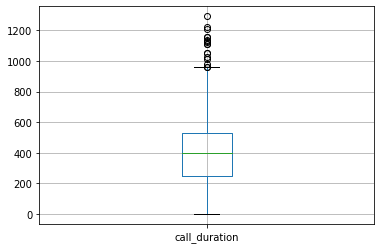

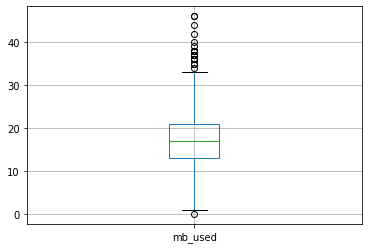

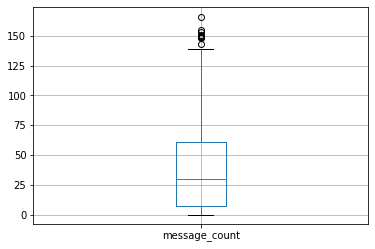

In [ ]:
##Ultimate Plan: Dispersion


ultimate_plan_users_data.boxplot(column='call_duration')
plt.show()

ultimate_plan_users_data.boxplot(column='mb_used')
plt.show()

ultimate_plan_users_data.boxplot(column='message_count')
plt.show()

### Conclusion  
* The boxplots confirm the the mean and median calculations seen above but also demonstrate that there are many outliers within each field.

In [ ]:
## Ultimate Plan: Standard Deviation

print(ultimate_plan_users_data['call_duration'].describe())

print(ultimate_plan_users_data['mb_used'].describe())

print(ultimate_plan_users_data['message_count'].describe())

count     720.000000
mean      406.193083
std       227.246499
min         0.000000
25%       246.290000
50%       398.585000
75%       532.227500
max      1292.090000
Name: call_duration, dtype: float64
count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: mb_used, dtype: float64
count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: message_count, dtype: float64


### Conclusion  
* The standard deviation found using describe() is very similar to the quartiles seen in the boxplots above.

<Figure size 864x576 with 0 Axes>

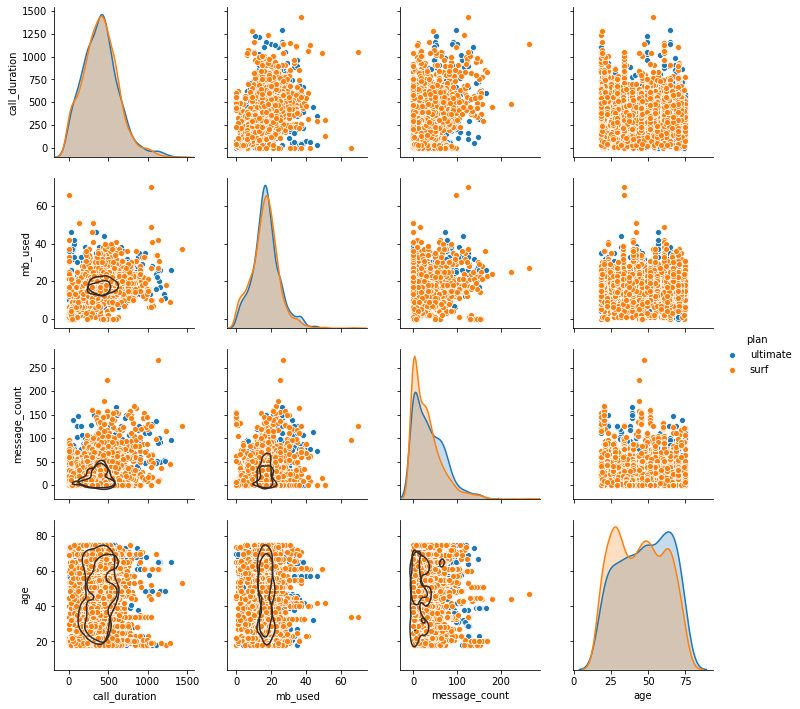

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
g = sns.pairplot(combined_df,  hue='plan', vars=['call_duration', 'mb_used', 'message_count', 'age'])
g.map_lower(sns.kdeplot, levels=1, color=".2")

### Conclusion  
* This was used in the last webinar, but I decided to add it to my project because it does a good job of demonstrating the overlap between surf and ultimate in relation to call_duration, mb_used, message_count, and age.  In general, it shows that the plans are quite similar in relation to usage of services.  It also demonstrates that there is a bit of a difference in age in relation to who purchases which package.  Younger people seem to prefer the surf (cheaper) plan, whereas older people seem to prefer the ultimate (more expensive) plan.  

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


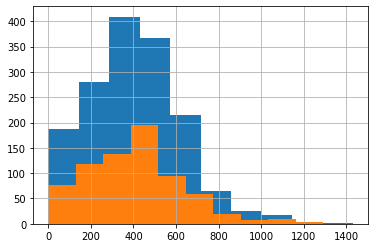

In [ ]:
print(pd.Series(surf_plan_users_data['call_duration']).hist())
print(pd.Series(ultimate_plan_users_data['call_duration']).hist())


### Conclusion  
* This histogram shows that, in general, the usage of call minutes is quite similar across the packages.  Additionally, it shows that many more people participate in the surf plan.  

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


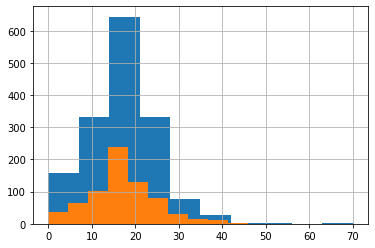

In [ ]:
print(pd.Series(surf_plan_users_data['mb_used']).hist())
print(pd.Series(ultimate_plan_users_data['mb_used']).hist())

### Conclusion   
* This histogram shows that, in general, the usage of mb usage is quite similar across the packages.  Additionally, it shows that many more people participate in the surf plan.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


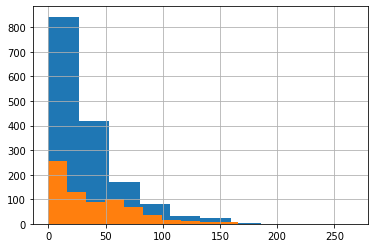

In [ ]:
print(pd.Series(surf_plan_users_data['message_count']).hist())
print(pd.Series(ultimate_plan_users_data['message_count']).hist())

### Conclusion  
* This histogram shows that, in general, the usage of text messages is quite similar across the packages.  Additionally, it shows that many more people participate in the surf plan.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff020eb6450>]],
      dtype=object)

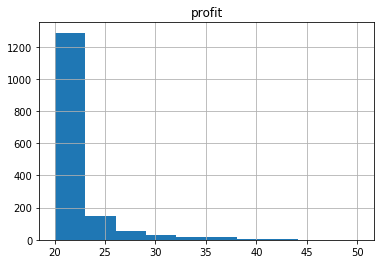

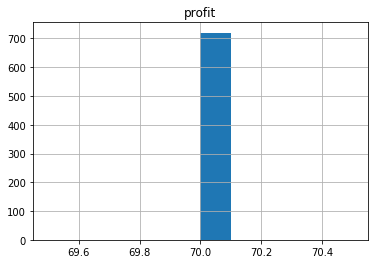

In [ ]:
##Profit


surf_plan_users_data.hist(column='profit')
ultimate_plan_users_data.hist(column='profit')

### Conclusion  
* These histograms show the vast difference in the profits made by each plan with the ultimate plan having a much higher profit margin.   

In [ ]:
##Profit Surf: Mean and Median


print(surf_plan_users_data['profit'].mean())
print(surf_plan_users_data['profit'].median())

21.675089383343924
20.0


In [ ]:
##Profit Ultimate: Mean and Meidan

print(ultimate_plan_users_data['profit'].mean())
print(ultimate_plan_users_data['profit'].median())

70.0
70.0


### Conclusion  
* As shown in the histograms above, the mean/median calculations for the two plans show a vast difference in profit margin.  Users of the surf plan go over their limits and pay extra fees every month but the profit from those extra fees is still far below that of the standard ultimate package.  (See sums below also.)

In [ ]:
##Profit Sum

print(surf_plan_users_data['profit'].sum())
print(ultimate_plan_users_data['profit'].sum())

34094.91559999999
50400.0


Correlation between age and profit: -0.06042516481917231


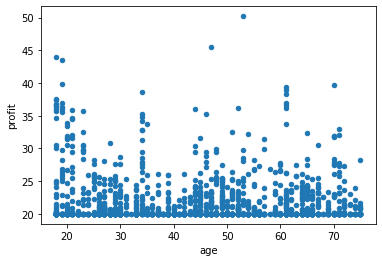

In [ ]:
surf_plan_users_data.plot(x='age', y='profit', kind='scatter')
print('Correlation between age and profit:' ,surf_plan_users_data['age'].corr(surf_plan_users_data['profit']))

## Conclusion  
* For this section, I wanted to see if there was a correlation between age and profit and there isn't.

Correlation between age and profit: nan


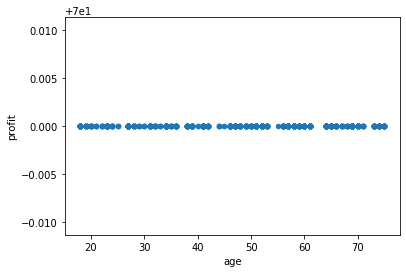

In [ ]:
ultimate_plan_users_data.plot(x='age', y='profit', kind='scatter')
print('Correlation between age and profit:' ,ultimate_plan_users_data['age'].corr(ultimate_plan_users_data['profit']))

### Conclusion  
* For this section, I wanted to see if there was a correlation between age and profit and there isn't.

## Step IV: Test the hypotheses

In [ ]:
##The average profit from users of Ultimate and Surf calling plans differs.

from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(
        surf_plan_users_data['profit'],
        ultimate_plan_users_data['profit'])

print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")





p-value:  0.0
We reject the null hypothesis


### Conclusion  
* According to the above test, there is a difference in profits between the two plans.

In [ ]:
##The average profit from users in NY-NJ area is different from that of the users from other regions.


def extract_state(row):
    address = row['city']
    words = address.split(' ')
    res = ""
    for item in words:
        if (len(item) ==2) and item[0].isupper() and item[1].isupper():
            res = item
    return res

combined_df['state'] = combined_df.apply(extract_state, axis=1)




In [ ]:
profit_NYJ = combined_df[(combined_df['state'] == 'NJ') | (combined_df['state'] == 'NY')]
profit_Others = combined_df[(combined_df['state'] == 'NJ') != (combined_df['state'] == 'NY')]

alpha = .05

results = st.ttest_ind(
        profit_NYJ['profit'],
        profit_Others['profit'])

print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  1.0
We can't reject the null hypothesis


### Conclusion  
* According to this test, there is no real difference between the profits coming from NY and NJ and the rest of the United States.  (see histograms below also)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff020c0a790>]],
      dtype=object)

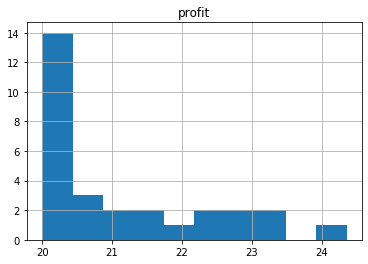

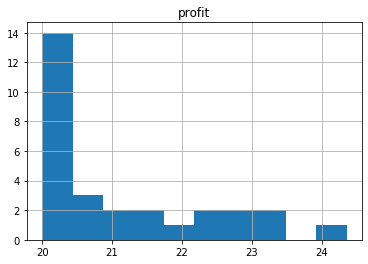

In [ ]:
profit_NYJ.hist(column='profit')
profit_Others.hist(column='profit')


## Overall Conclusion

* Overall, it seems that the Ultimate plan is more profitable than the Surf plan even though more people subscribe to the Surf plan.  The users of both plans use a similar amount of call minutes, text messages and internet mb's per month, however, the users of the Ultimate plan pay much more in relation to the monthly flat rate.

* Surf subscribers tend to be younger and text a bit more, but the difference isn't substantial.